In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:

df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
X=df.iloc[:,2:4].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<Axes: >

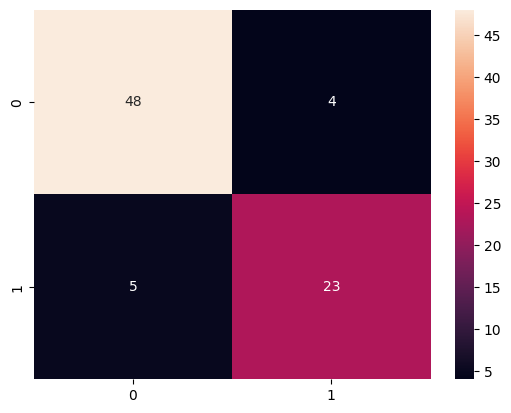

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

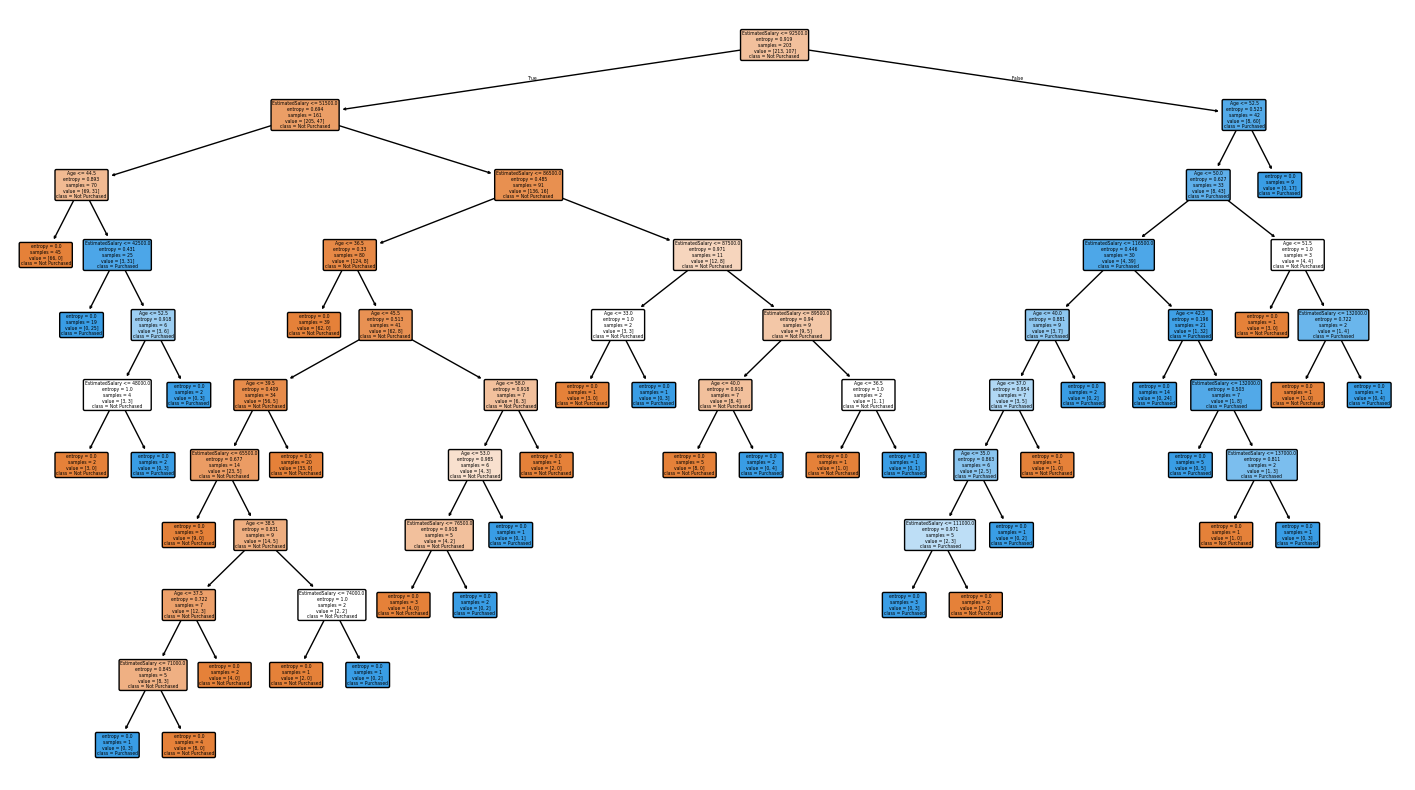

In [ ]:
from sklearn.tree import plot_tree
single_tree = classifier.estimators_[0]

plt.figure(figsize=(18,10))
plot_tree(
    single_tree,
    feature_names=['Age','EstimatedSalary'],
    class_names=['Not Purchased','Purchased'],
    filled=True,
    rounded=True
)
plt.show()

**Credit Card Fraud Detection Dataset**

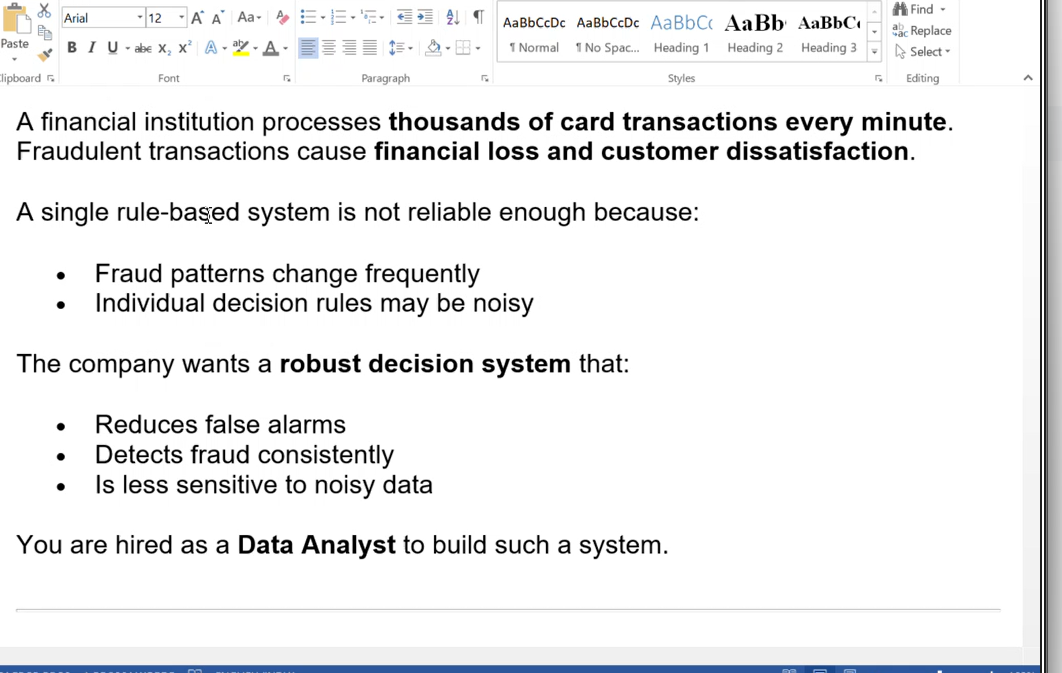

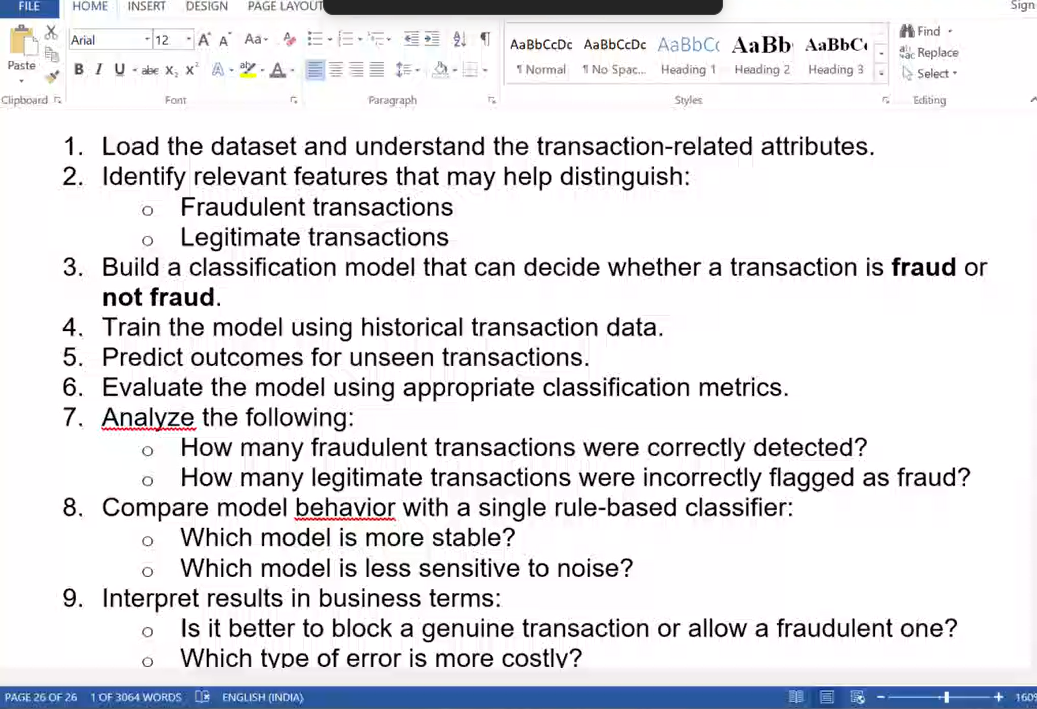

In [ ]:
df=pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.size

247163

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]


In [ ]:
df["Class"].value_counts()


,count
Class,
0.0,7947
1.0,25


In [ ]:
from sklearn.model_selection import train_test_split

# Drop rows with NaN values from both X and y
valid_indices = y.dropna().index
X_cleaned = X.loc[valid_indices]
y_cleaned = y.dropna()

X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_cleaned,
    test_size=0.2,
    random_state=42,
    stratify=y_cleaned
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
cm


array([[1590,    0],
       [   1,    4]])

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1590
         1.0       1.00      0.80      0.89         5

    accuracy                           1.00      1595
   macro avg       1.00      0.90      0.94      1595
weighted avg       1.00      1.00      1.00      1595



In [ ]:
tn, fp, fn, tp = cm.ravel()

print("Fraud correctly detected (TP):", tp)
print("Legitimate wrongly flagged as fraud (FP):", fp)


Fraud correctly detected (TP): 4
Legitimate wrongly flagged as fraud (FP): 0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

rule_model = DecisionTreeClassifier(random_state=42)
rule_model.fit(X_train, y_train)

rule_pred = rule_model.predict(X_test)

print(confusion_matrix(y_test, rule_pred))


[[1590    0]
 [   1    4]]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9993730407523511


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1590
         1.0       1.00      0.80      0.89         5

    accuracy                           1.00      1595
   macro avg       1.00      0.90      0.94      1595
weighted avg       1.00      1.00      1.00      1595



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[1590,    0],
       [   1,    4]])

In [ ]:
tn, fp, fn, tp = cm.ravel()

print("Fraud correctly detected (True Positives):", tp)
print("Legitimate wrongly flagged as fraud (False Positives):", fp)
print("Fraud missed (False Negatives):", fn)
print("Legitimate correctly allowed (True Negatives):", tn)


Fraud correctly detected (True Positives): 4
Legitimate wrongly flagged as fraud (False Positives): 0
Fraud missed (False Negatives): 1
Legitimate correctly allowed (True Negatives): 1590


In [ ]:
from sklearn.metrics import accuracy_score

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, rule_pred))


Random Forest Accuracy: 0.9993730407523511
Decision Tree Accuracy: 0.9993730407523511
